<a href="https://colab.research.google.com/github/MikeLMurray/skills-introduction-to-git1hub/blob/main/Murray1_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Assignment 10] Feature Engineering; comparison of PCA with Perceptron Transformer!

## Step 0: Importing Base Modules



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load the Dataset

In this assignment, you will work with a dataset called **Fashion-MNIST**. This dataset contains images (60000 for training and 10000 for testing) labeled with 10 different classes:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot"

You can read more about the dataset here: https://github.com/zalandoresearch/fashion-mnist


In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's see the size of the arrays

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Let's look at some of the sample images

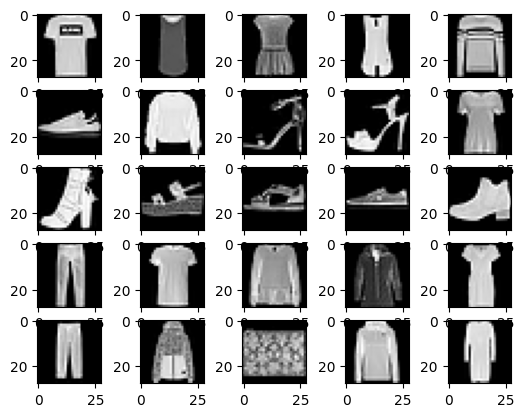

In [4]:
import matplotlib.pyplot as plt
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(X_train[i],cmap='gray')

##Step 2: Reshape the dataset arrays

1.  Reshape the training/testing dataset arrays to be 2 dimensional.
2.  Change the values to the absolute value of `(255-the original value)` as we did in the lectures.

In [5]:
#Reshape the training/testing dataset arrays to be 2 dimensional
X_train_Reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_Reshaped = X_test.reshape(X_test.shape[0],-1)

#Change the values to the absolute value of (255-the original value)
X_train_Reshaped=abs(255-X_train_Reshaped)
X_test_Reshaped=abs(255-X_test_Reshaped)

If you completed the code above correctly, the following command should show images with white background

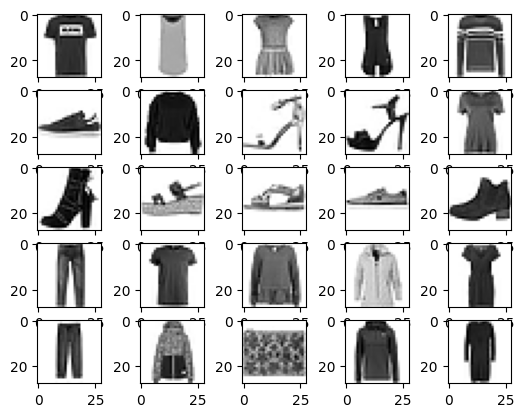

In [6]:
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(X_train_Reshaped[i].reshape(28,28),cmap='gray')

##Step 3: Building a pipeline
PCA + Linear classifier (Logistic regression)

### Step 3.1: Applying PCA

Run the code below to find the first 30 major principle components in the dataset.Don't change anything in the following block.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_Reshaped)
X_test_pca = pca.transform(X_test_Reshaped)

Select the minimum number of components, `n_components`, that capture 70 percent of the variance in the training data. You need to try different numbers in the next block and then print the `total_variance_n_components` till you get 70%

In [9]:
n_components=30

Write code that calculates the total variance of the `n_components` selected above and stores it in the variable `total_variance_n_components`:

In [10]:
#total_variance_n_components=
total_variance_n_components=0
for i in range(n_components):
  total_variance_n_components+=pca.explained_variance_ratio_[i]

In [11]:
print(total_variance_n_components)

0.8207394504088492


### Step 3.2 Logistic regression

Set the parameters of the `LogisticRegression` till you dont get any warning! The `max_iter` **must be less than or equaln to 100**, you should play with other parameters.

In [12]:
from sklearn.linear_model import LogisticRegression
#Set the parameters of the LogisticRegression till you dont get any warning! The max_iter must be less than or equaln to 100, you should play with other parameters.
LGR=LogisticRegression(solver='liblinear', max_iter=100)#fill the model paramaeters inside the paranthesis.

#Do not change the line below
LGR.fit(X_train_pca[:,0:n_components],y_train)

LogisticRegression(solver='liblinear')

Run the following code to evaluate your result. Do not change anything!

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6000
           1       0.96      0.95      0.96      6000
           2       0.71      0.70      0.70      6000
           3       0.80      0.86      0.82      6000
           4       0.70      0.76      0.73      6000
           5       0.88      0.89      0.88      6000
           6       0.59      0.44      0.50      6000
           7       0.87      0.87      0.87      6000
           8       0.92      0.93      0.92      6000
           9       0.91      0.93      0.92      6000

    accuracy                           0.81     60000
   macro avg       0.81      0.81      0.81     60000
weighted avg       0.81      0.81      0.81     60000

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1000
           1       0.96      0.95      0.96      1000
           2       0.68      0.68      0.68      1000
           3       0.79 

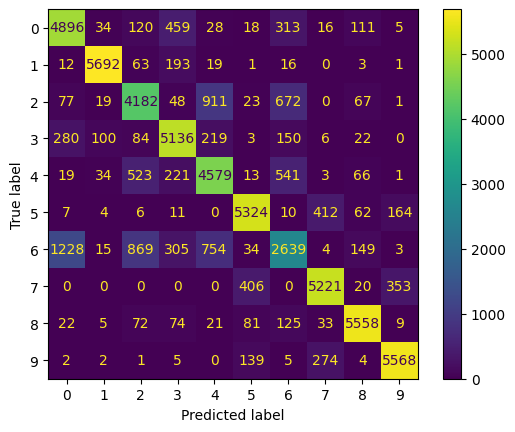

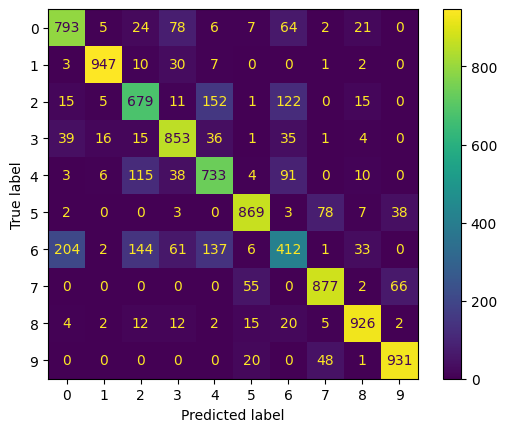

In [13]:
from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score

print(classification_report(y_train,LGR.predict(X_train_pca[:,0:n_components])))
print(classification_report(y_test,LGR.predict(X_test_pca[:,0:n_components])))
ConfusionMatrixDisplay(confusion_matrix(y_train,LGR.predict(X_train_pca[:,0:n_components]))).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,LGR.predict(X_test_pca[:,0:n_components]))).plot()

Based on the above values, which class has the largest number of misclassified records?

In [14]:
#Worstclass_LGR=
cm_test = confusion_matrix(y_test, LGR.predict(X_test_pca[:,0:n_components]))

# Calculate the sum of off-diagonal elements for each class
misclassified_counts = cm_test.sum(axis=0) + cm_test.sum(axis=1) - 2 * np.diag(cm_test)

# Find the class with the maximum misclassified count
Worstclass_LGR = np.argmax(misclassified_counts)

print(f"The class with the largest number of misclassified records is: {Worstclass_LGR}")

The class with the largest number of misclassified records is: 6


## Step 4: MLP

<font color=red> Read Carefully: <Font>

In the previous section, we applied a linear classifier, `LogisticRegression`, to a selected number of Principal components and achieved an accuracy of ~70%.

>  Original Features (784 features) > PCA > Transformed features (n_components) > LogisticRegression

In this section, we would like to build a multi-layer perceptron network that has the same number of hidden layer perceptrons as `n_components` and see if we can achieve better results. In other words, instead of using PCA, which is a linear transformer, we will use a hidden layer to transform the data into the same number of components and then classify it with the last layer of perceptrons.

>  Original Features (784 features) > Hidden Layer Perceptrons > Transformed features (n_components) > Output layer Perceptrons




###Step 4.1 Normalizing the features

Never forget that you need to normalize the features before training **Neural Networks**. Complete the following code and normalize the features using `StandardScaler`

In [15]:
from sklearn.preprocessing import StandardScaler
#Compleate the code below
scaler = StandardScaler()
X_train_Reshaped_normalized= scaler.fit_transform(X_train_Reshaped)
X_test_Reshaped_Normalized= scaler.transform(X_test_Reshaped)

### Step 4.2 Training the MLP

Run the following code without changing anything!

In [16]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(hidden_layer_sizes=(n_components,),max_iter=300)
MLP.fit(X_train_Reshaped_normalized,y_train)

MLPClassifier(hidden_layer_sizes=(30,), max_iter=300)

Run the following code to see the performance of a 2 layer perceptron. The first layer transform the 784 features to `n_components` features and the second layer classifies.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6000
           1       1.00      1.00      1.00      6000
           2       0.97      0.95      0.96      6000
           3       0.99      0.99      0.99      6000
           4       0.94      0.98      0.96      6000
           5       1.00      1.00      1.00      6000
           6       0.97      0.94      0.95      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.78      0.77      1000
           3       0.85 

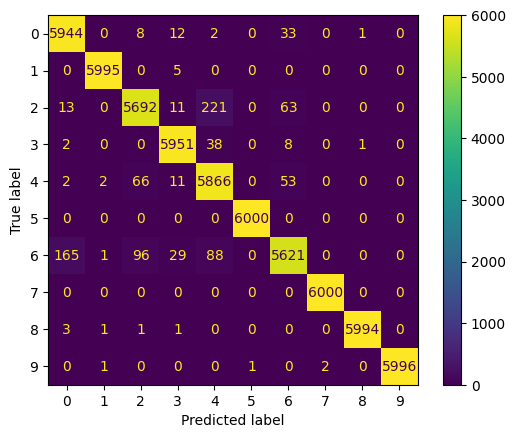

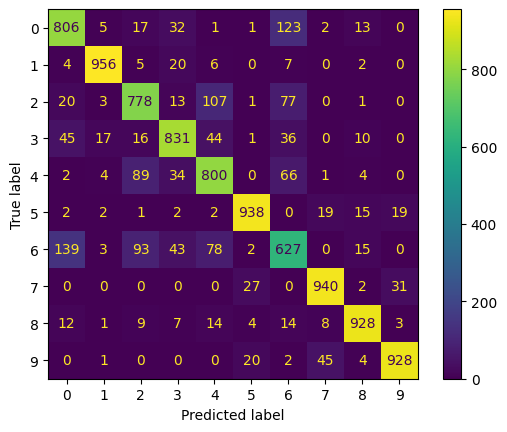

In [17]:
from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_train,MLP.predict(X_train_Reshaped_normalized)))
print(classification_report(y_test,MLP.predict(X_test_Reshaped_Normalized)))
ConfusionMatrixDisplay(confusion_matrix(y_train,MLP.predict(X_train_Reshaped_normalized))).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,MLP.predict(X_test_Reshaped_Normalized))).plot()

<font color=red>**As anticipated**, the two-layer perceptron outperforms PCA followed by Logistic Regression. The reason behind this is that the Hidden Layer Perceptron acts as a non-linear transformer. During training, we optimize the transformer's weights to achieve the most effective feature transformation, ultimately leading to improved classification results.

### Step 4.3 Extracting the features from the first layer

Accessing `MLP.coefs_[0]` and `MLP.intercepts_[0]` allows us to retrieve the coefficients associated with the hidden layer. The input dimension of the hidden layer is 784, corresponding to the original features, while the output dimension is 9, representing the transformed features.

Complete the folling code to get the output of the hidden layer; Transformed features. As a reminder:

*   `np.matmul(x,y)` performs matrix multiplication of array x by array y.
*   `np.maximum(x,0)` applys the ReLU function on all elements of the x array

In [18]:
#X_train_Reshaped_normalized_Transformed=
X_train_Reshaped_normalized_Transformed = np.maximum(np.matmul(X_train_Reshaped_normalized, MLP.coefs_[0]) + MLP.intercepts_[0], 0)
#X_test_Reshaped_normalized_Transformed=
X_test_Reshaped_normalized_Transformed = np.maximum(np.matmul(X_test_Reshaped_Normalized, MLP.coefs_[0]) + MLP.intercepts_[0], 0)

If you have the correct code, running the following two codes should give you `True`

In [19]:
isinstance(X_train_Reshaped_normalized_Transformed, np.ndarray) and isinstance(X_test_Reshaped_normalized_Transformed, np.ndarray)

True

In [20]:
X_train_Reshaped_normalized_Transformed.shape==(60000,n_components) and X_test_Reshaped_normalized_Transformed.shape==(10000,n_components)

True

### Step 4.4 Logistic Regression

In this step, we will train logistic regression using the transformed features obtained from the hidden layer of the two-layer perceptron to determine if we can achieve better results than with PCA followed by Logistic Regression (PCA+LGR). Set the model parameters exactly as you did in step 3.2. As a reminder, the maximum number of iterations must be less than or equal to 100.

In [21]:
from sklearn.linear_model import LogisticRegression

#LGR2=LogisticRegression()#enter model paramters inside the paranthesis
LGR2=LogisticRegression(solver='liblinear', max_iter=100)#fill the model paramaeters inside the paranthesis

#Do not change the line below
LGR2.fit(X_train_Reshaped_normalized_Transformed,y_train)

LogisticRegression(solver='liblinear')

Just run the following code to see the model performance, you don't need to change anything.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6000
           1       0.99      0.99      0.99      6000
           2       0.92      0.92      0.92      6000
           3       0.95      0.97      0.96      6000
           4       0.93      0.94      0.93      6000
           5       0.96      0.97      0.96      6000
           6       0.93      0.85      0.89      6000
           7       0.97      0.97      0.97      6000
           8       0.97      0.98      0.97      6000
           9       0.98      0.98      0.98      6000

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.98      0.95      0.96      1000
           2       0.77      0.79      0.78      1000
           3       0.84 

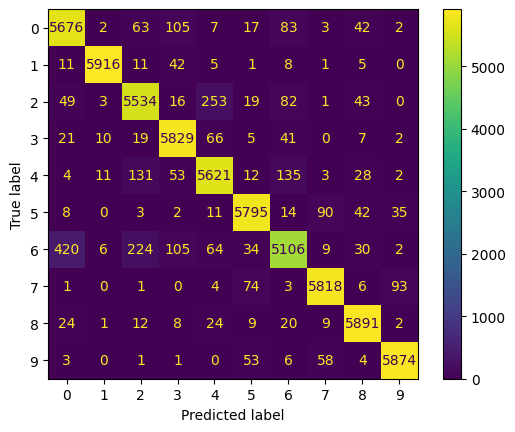

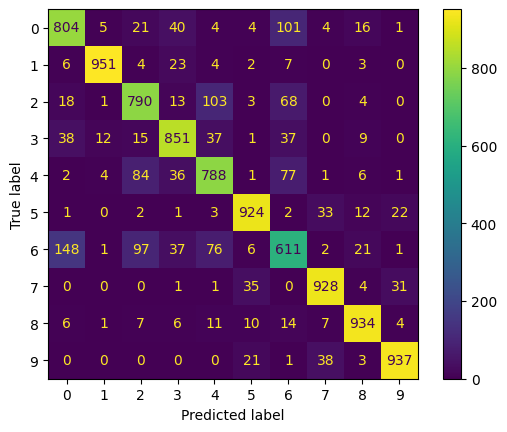

In [22]:
from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_train,LGR2.predict(X_train_Reshaped_normalized_Transformed)))
print(classification_report(y_test,LGR2.predict(X_test_Reshaped_normalized_Transformed)))
ConfusionMatrixDisplay(confusion_matrix(y_train,LGR2.predict(X_train_Reshaped_normalized_Transformed))).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,LGR2.predict(X_test_Reshaped_normalized_Transformed))).plot()

###Step 4.5 Read the remarks below

<font color=red>Important!<font>

We went through three different pipelines:

1. **Pipeline 1**: Feature transformation using PCA followed by a Linear Classifier (Logistic Regression).
2. **Pipeline 2**: A two-layer Perceptron where the first layer performs feature transformation, followed by a Linear Classifier (Perceptron).
3. **Pipeline 3**: Feature transformation using a Hidden Layer Perceptron, followed by a Linear Classifier (Logistic Regression).

The accuracy of your two-layer perceptron, where the first layer transforms features and the second layer classifies, on the test dataset should **surpass** what you were able to achieve with PCA followed by Logistic Regression. In other words, the first layer of your neural network outperforms PCA in feature transformation. We confirmed that the improvement in performance is indeed due to the feature transformation by applying logistic regression on the transformed features from the hidden layer of the MLP, and we obtained the same result.

**<font color=red>You made it - Impressive result?!</font>**